In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('booking_train_set.csv')

In [3]:
df.drop(['index'],axis=1,inplace = True);

In [4]:
df.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1048575 non-null  int64 
 1   checkin         1048575 non-null  object
 2   checkout        1048575 non-null  object
 3   city_id         1048575 non-null  int64 
 4   device_class    1048575 non-null  object
 5   affiliate_id    1048575 non-null  int64 
 6   booker_country  1048575 non-null  object
 7   hotel_country   1048575 non-null  object
 8   utrip_id        1048575 non-null  object
dtypes: int64(3), object(6)
memory usage: 72.0+ MB


In [6]:
df.nunique()

user_id           181231
checkin              425
checkout             425
city_id            38638
device_class           3
affiliate_id        3126
booker_country         5
hotel_country        193
utrip_id          195685
dtype: int64

In [7]:
(1048575 - 181231*4)/4

80912.75

# Notes

user_id has 80912 repeats. This suggests up to this many users had multiple holidays. There may be potential in using previous visit data to help predict future. 

Checkin and checkout are both dates in string format. These need to be converted into python datatime objects. More features should be developed from these including: holiday months, holiday duration.

city_id is the feature we are trying to predict. Since this is also based on previous cities, this feature is both input and output. To allow for input we must encode this. Simple label encoding is not the most effective way to encode this as the system may find patterns in the ordering even though there are none. However this will be an effective way to set a baseline and find better encoidng methods to improve on this. 

device_class is a feautre with 3 possibilities. Since it is such a small feature we can use one hot encoding to encode this. 

Affiliate_id again requires encoding and since it has 3126 unqiue ids, one hot encoding wil not be effective as it will create too many dimensions. As such we must, similar to city_id, encode this using label encoding to start off and then improve once the baseline has been established. 

booker_countr only has 5 categories and such can be encoded using one hot encoding. However since the data is similar to hotel country, it may be possible to encode it using the labels from this. This needs to be investigated.

Hotel_country has 193 unqiue objects suggesting again to use label encoding to esatblish baseline. 


In [8]:
# Convert to dateimte

df['checkin'] = df['checkin'].apply(lambda x: pd.to_datetime(x))
df['checkout'] = df['checkout'].apply(lambda x: pd.to_datetime(x))

In [9]:
# Get Month

df['Month'] = df['checkin'].apply(lambda x: x.month)

In [10]:
# Get Duration

df['Duration'] = df['checkout'] - df['checkin']
df['Duration'] = df['Duration'].apply(lambda x: x.days)

In [11]:
# Get Labels for Cities

df["city_id"] = df["city_id"].astype('category')
df["cityLabel"] = df["city_id"].cat.codes

In [12]:
# Get Labels for Deices

df["device_class"] = df["device_class"].astype('category')
df["deviceLabel"] = df["device_class"].cat.codes

In [13]:
# Get Labels for affiliate id

df["affiliate_id"] = df["affiliate_id"].astype('category')
df["affiliateLabel"] = df["affiliate_id"].cat.codes

In [14]:
# Get Labels for Booker Country

df["booker_country"] = df["booker_country"].astype('category')
df["bookerCountryLabel"] = df["booker_country"].cat.codes

In [15]:
# Get Labels for Hotel Country

df["hotel_country"] = df["hotel_country"].astype('category')
df["hotelCountryLabel"] = df["hotel_country"].cat.codes

In [16]:
df.head()

,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,Month,Duration,cityLabel,deviceLabel,affiliateLabel,bookerCountryLabel,hotelCountryLabel
0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,4,2,17798,0,131,2,60
1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,4,1,22669,0,131,2,60
2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4,4,11574,0,131,2,59
3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,4,1,13853,0,131,2,60
4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,7,1,3064,1,122,4,36


In [17]:
type(df['Duration'][0])

numpy.int64

In [18]:
dfnumerical = df[['Month', 'Duration', 'cityLabel', 'deviceLabel', 'affiliateLabel', 'bookerCountryLabel', 'hotelCountryLabel']]

<AxesSubplot:>

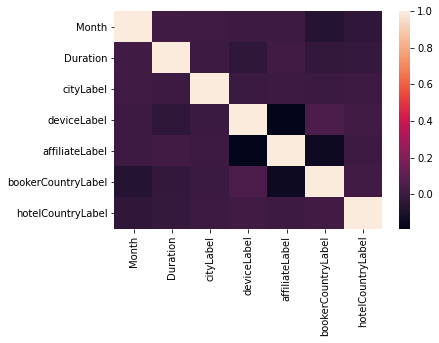

In [19]:
sns.heatmap(dfnumerical.corr())

In [20]:
X = dfnumerical[['Month', 'Duration', 'deviceLabel', 'affiliateLabel', 'bookerCountryLabel', 'hotelCountryLabel']]
y = dfnumerical['cityLabel']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [23]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()


In [25]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [3]:
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
print(classification_report(y_test,predictions))

NameError: name 'y_test' is not defined

In [ ]:
print(confusion_matrix(y_test,predictions))